# EDA Bike Details


In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
#1  What is the range of selling prices in the dataset?

df['selling_price'].describe()

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [ ]:
df['selling_price'].isnull().sum()
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

min_price, max_price, price_range

(5000, 760000, 755000)

In [ ]:
#insights >> min selling price is 5000
#max selling price is 760000
#and price range is 755000

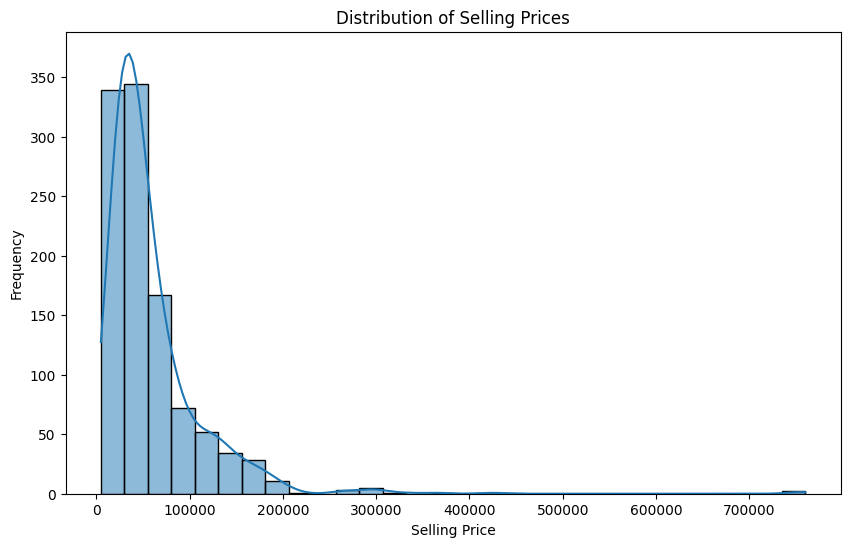

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# q2 What is the median selling price for bikes in the dataset?

df['selling_price'].median()

45000.0

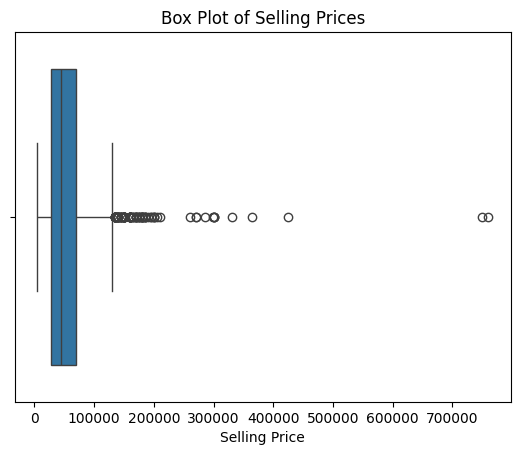

In [ ]:
#median selling price is 45000

sns.boxplot(x=df['selling_price'])
plt.title('Box Plot of Selling Prices')
plt.xlabel('Selling Price')
plt.show()

In [ ]:
# q3  What is the most common seller type?

df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


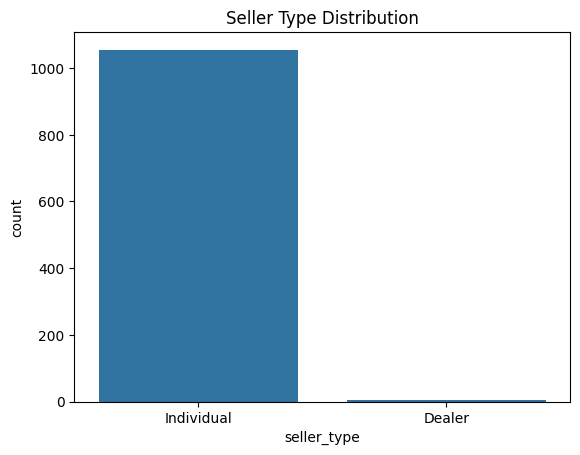

In [ ]:
# most common seller are individuals

sns.countplot(x='seller_type', data=df)
plt.title('Seller Type Distribution')
plt.show()

In [ ]:
# q4 How many bikes have driven more than 50,000 kilometers?

bikes_50k_driven = df[df['km_driven'] > 50000].shape[0]
bikes_50k_driven

170

In [ ]:
# q5 What is the average km_driven value for each ownership type?

df.groupby('owner')['km_driven'].mean().round(2)

,km_driven
owner,
1st owner,32816.58
2nd owner,39288.99
3rd owner,33292.18
4th owner,311500.00


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
# q6 What proportion of bikes are from the year 2015 or older?

bikes_2015_older = df[df['year'] >= 2015].shape[0]
total_bikes = df.shape[0]
proportion_2015_older = (bikes_2015_older / total_bikes) * 100
proportion_2015_older

52.780395852968894

In [ ]:
# q7 What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
#q 8 What is the highest ex_showroom_price recorded, and for which bike?

highest_price_bike = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
highest_price_bike

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [ ]:
# highest ex_showroom price recorded is 1278000 and its for Harley_Davidson Street Bob

In [ ]:
#q 9 What is the total number of bikes listed by each seller type?

df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
# 10  What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_df = df[df['owner'] == '1st owner']
correlation = first_owner_df['selling_price'].corr(first_owner_df['km_driven'])
correlation

np.float64(-0.2434817484496572)

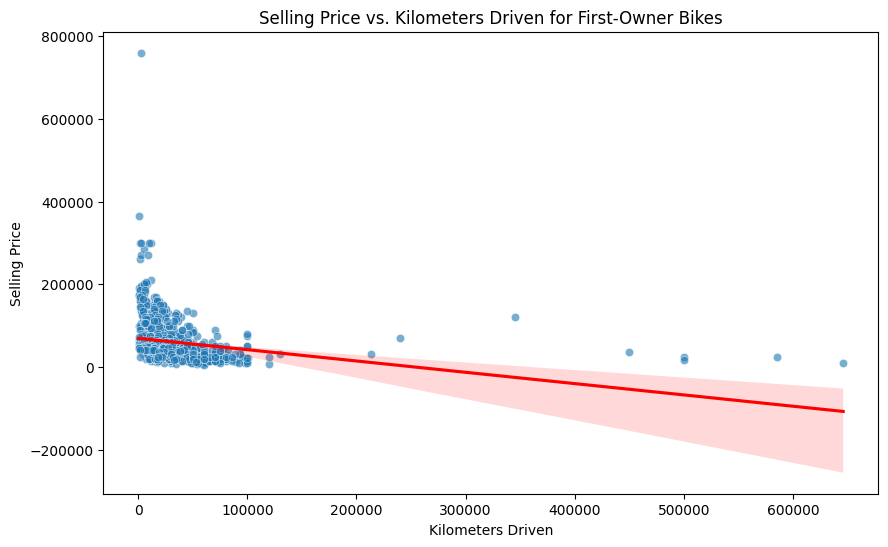

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_df, alpha=0.6)
sns.regplot(x='km_driven', y='selling_price', data=first_owner_df, scatter=False, color='red')
plt.title('Selling Price vs. Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
#prices arefalling with increasing distance driven by bikes

In [ ]:
#11 Identify and remove outliers in the km_driven column using the IQR method

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

cleaned_df = df.drop(outliers.index)
cleaned_df.shape


(1022, 7)

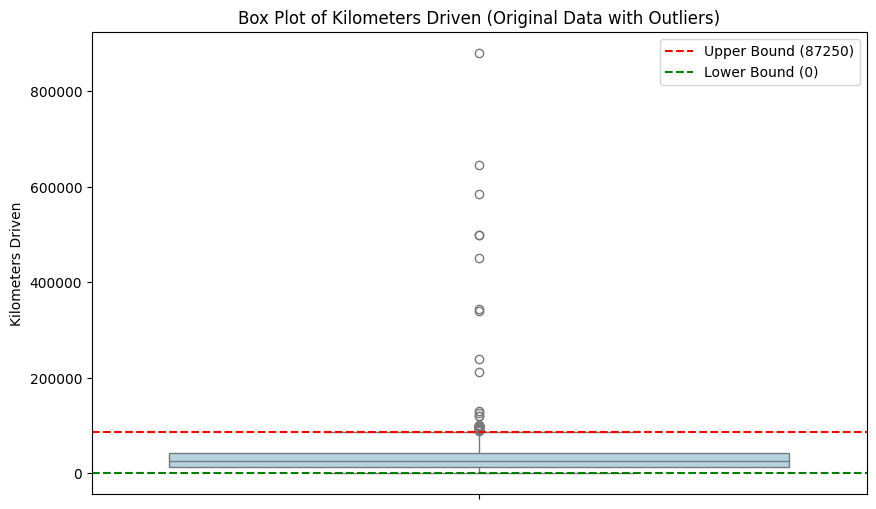

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['km_driven'], color='lightblue')
plt.axhline(y=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.0f})')
plt.axhline(y=lower_bound if lower_bound > 0 else 0, color='green', linestyle='--', label=f'Lower Bound (0)')
plt.title('Box Plot of Kilometers Driven (Original Data with Outliers)')
plt.ylabel('Kilometers Driven')
plt.legend()
plt.show()

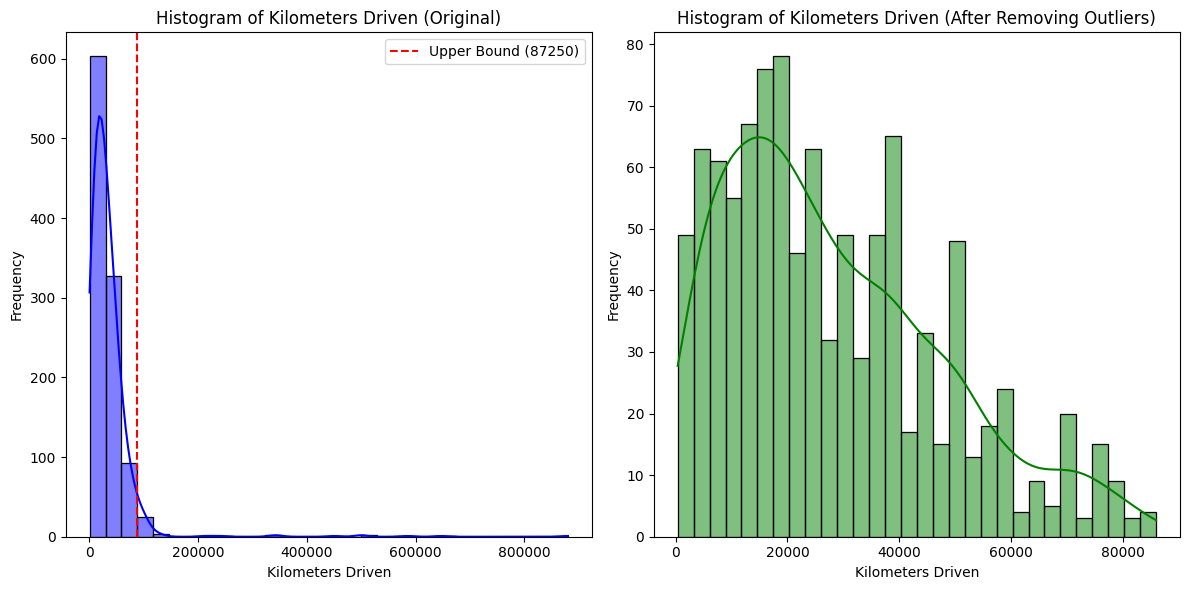

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['km_driven'], bins=30, kde=True, color='blue')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.0f})')
plt.title('Histogram of Kilometers Driven (Original)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(cleaned_df['km_driven'], bins=30, kde=True, color='green')
plt.title('Histogram of Kilometers Driven (After Removing Outliers)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

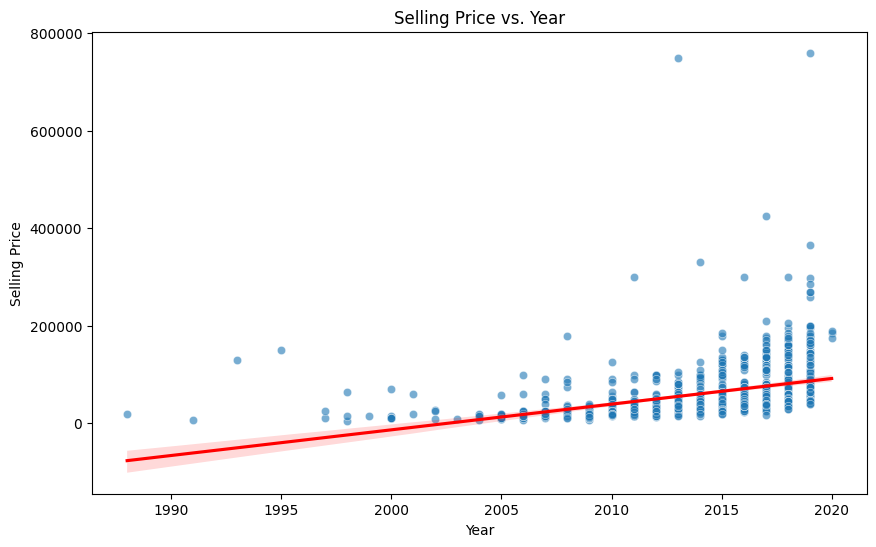

In [ ]:
# 12 Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6)
sns.regplot(x='year', y='selling_price', data=df, scatter=False, color='red')
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
# 13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2025
df['age'] = current_year - df['year']
df_valid = df.dropna(subset=['ex_showroom_price']).query('age > 0')
df_valid['depreciation_per_year'] = (df_valid['ex_showroom_price'] - df_valid['selling_price']) / df_valid['age']
average_depreciation = df_valid['depreciation_per_year'].mean()
print(f"Average depreciation per year: ₹{average_depreciation:.2f}")

Average depreciation per year: ₹2666.56


In [ ]:
# 14.  Which bike names are priced significantly above the average price for their manufacturing year?


avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year['threshold'] = avg_price_by_year['selling_price'] * 1.5

df = df.merge(avg_price_by_year[['year', 'selling_price', 'threshold']],
              on='year',
              suffixes=('', '_avg'))

high_priced_bikes = df[df['selling_price'] > df['threshold']][['year', 'name', 'selling_price']]

high_priced_bikes = high_priced_bikes.sort_values(by=['year', 'selling_price'], ascending=[True, False])

print("Bikes priced significantly above the average for their manufacturing year:")
for year in high_priced_bikes['year'].unique():
    print(f"\nYear {year}:")
    year_bikes = high_priced_bikes[high_priced_bikes['year'] == year]
    for _, row in year_bikes.iterrows():
        print(f"- {row['name']} (₹{row['selling_price']:,.0f})")

Bikes priced significantly above the average for their manufacturing year:

Year 1998:
- Yamaha RX135 (₹65,000)

Year 2000:
- Yamaha Rx (₹70,000)

Year 2005:
- Royal Enfield Thunderbird 350 (₹59,000)

Year 2006:
- Royal Enfield Electra 5 S (₹99,000)
- Royal Enfield Thunderbird 350 (₹60,000)

Year 2007:
- Royal Enfield Bullet 350 [2007-2011] (₹90,000)
- Royal Enfield Electra 5 S (₹60,000)
- Bajaj Pulsar 150 (₹50,000)
- Honda CB Unicorn 150 (₹50,000)
- Hero Honda Splendor Plus (₹40,000)

Year 2008:
- Royal Enfield Bullet 350 [2007-2011] (₹180,000)
- Royal Enfield Electra 4 S (₹90,000)
- Royal Enfield Electra 5 S (₹85,000)
- Royal Enfield Machismo (₹75,000)

Year 2009:
- Hero Honda CBZ extreme (₹40,000)
- Bajaj Pulsar 180 (₹35,000)
- Bajaj Pulsar 150 (₹35,000)

Year 2010:
- Kawasaki Ninja 250R (₹125,000)
- Royal Enfield Electra 5 S (₹90,000)
- Royal Enfield Thunderbird 350 (₹85,000)
- Bajaj Avenger [2015] (₹65,000)
- Bajaj Pulsar 150 [2001-2011] (₹55,000)
- Hero Honda Karizma ZMR [2010] (

<Axes: >

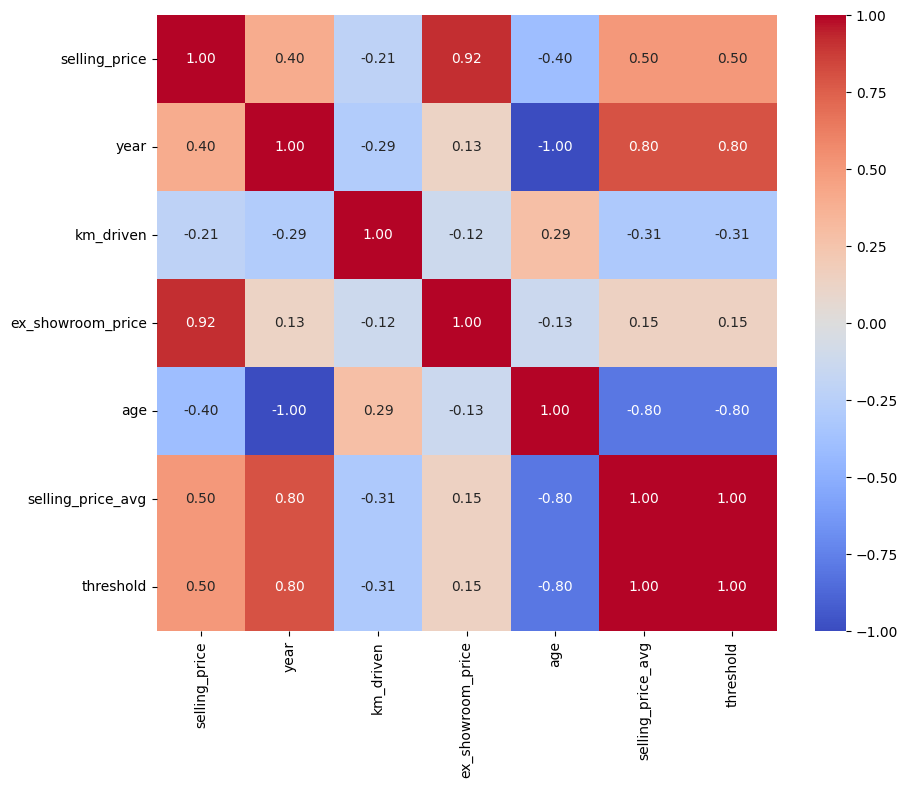

In [ ]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# EDA Car Sales

In [ ]:
df = pd.read_csv('Car Sale.csv')

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.tail()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [ ]:
df.shape

(23906, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.fillna('0', inplace = True)

In [ ]:
df.isnull().sum()


,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df['Body Style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

average_selling_price = df.groupby('Dealer_Name')['Price ($)'].mean()
average_selling_price

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [ ]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

car_brand_variation = df.groupby('Company')['Price ($)'].std()
car_brand_variation.sort_values(ascending=False)

,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


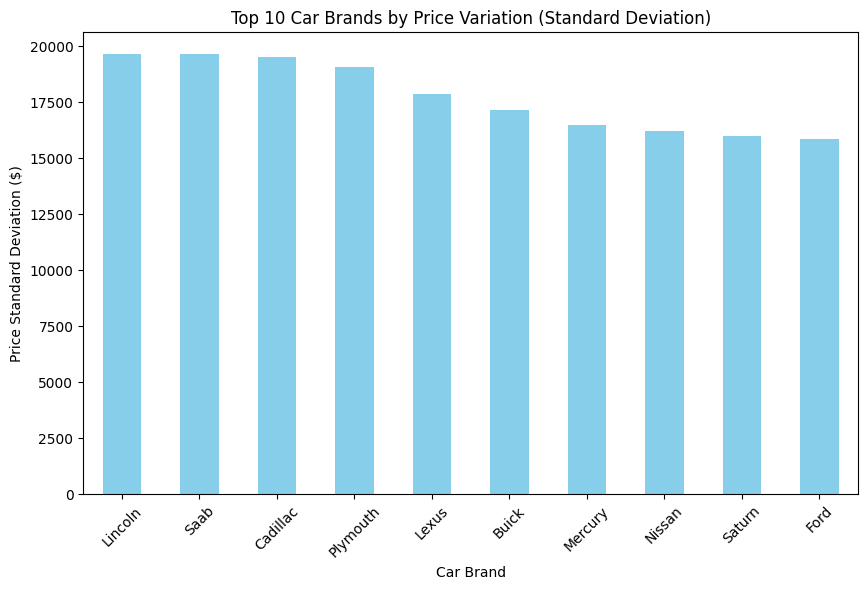

Car brand with highest price variation: Lincoln (Std Dev: $19658.05)


In [ ]:
# Group by Company and calculate standard deviation of prices
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Plot the top 10 brands with highest price variation
plt.figure(figsize=(10, 6))
price_variation.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Brands by Price Variation (Standard Deviation)')
plt.xlabel('Car Brand')
plt.ylabel('Price Standard Deviation ($)')
plt.xticks(rotation=45)
plt.show()

# Print the brand with the highest variation
top_brand = price_variation.idxmax()
top_variation = price_variation.max()
print(f"Car brand with highest price variation: {top_brand} (Std Dev: ${top_variation:.2f})")

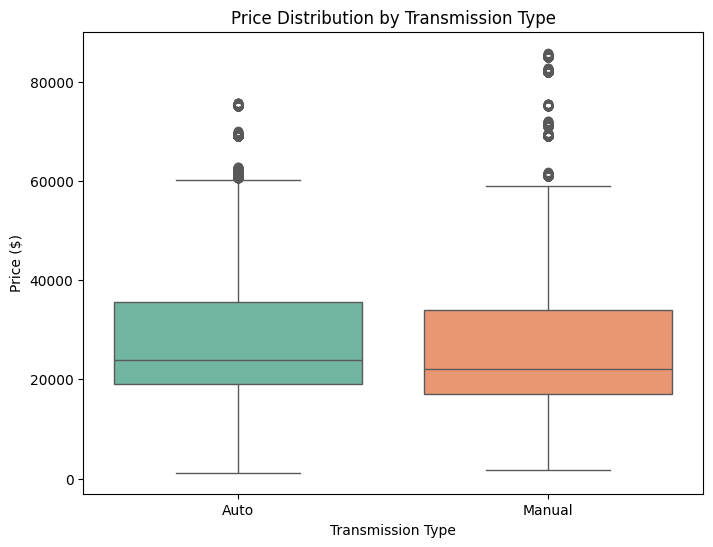

IQR for Auto Transmission: $16500.00
IQR for Manual Transmission: $17000.00


In [ ]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

# Plot boxplot of prices by transmission type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

# Calculate IQR for each transmission type
iqr_auto = df[df['Transmission'] == 'Auto']['Price ($)'].quantile(0.75) - df[df['Transmission'] == 'Auto']['Price ($)'].quantile(0.25)
iqr_manual = df[df['Transmission'] == 'Manual']['Price ($)'].quantile(0.75) - df[df['Transmission'] == 'Manual']['Price ($)'].quantile(0.25)

print(f"IQR for Auto Transmission: ${iqr_auto:.2f}")
print(f"IQR for Manual Transmission: ${iqr_manual:.2f}")

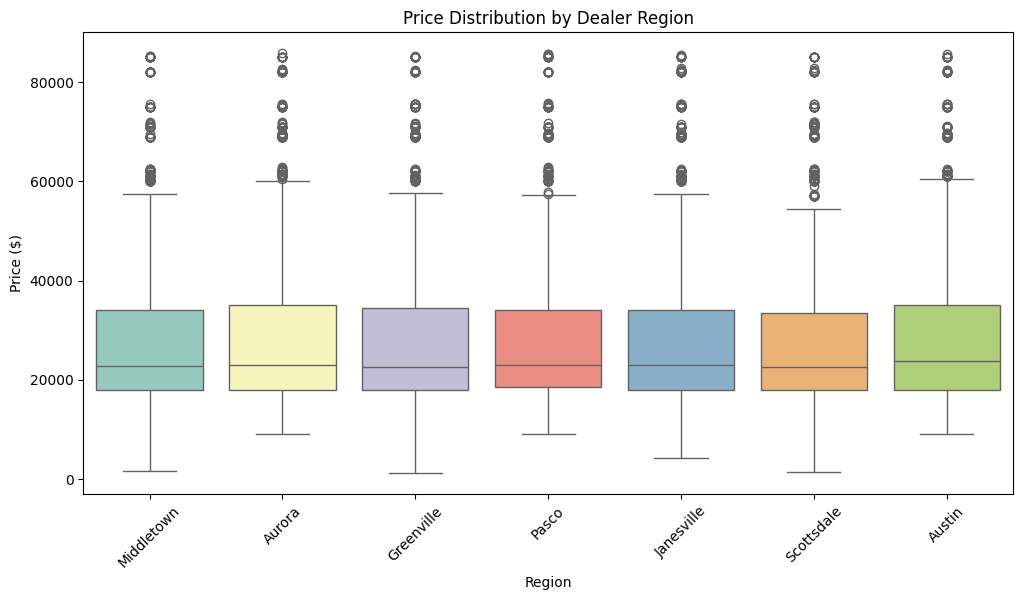

Price Statistics by Region:
                 count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.

In [ ]:
# 4. What is the distribution of car prices across different regions?

# Plot boxplot of prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set3')
plt.title('Price Distribution by Dealer Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Calculate summary statistics for each region
region_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print("Price Statistics by Region:\n", region_stats)

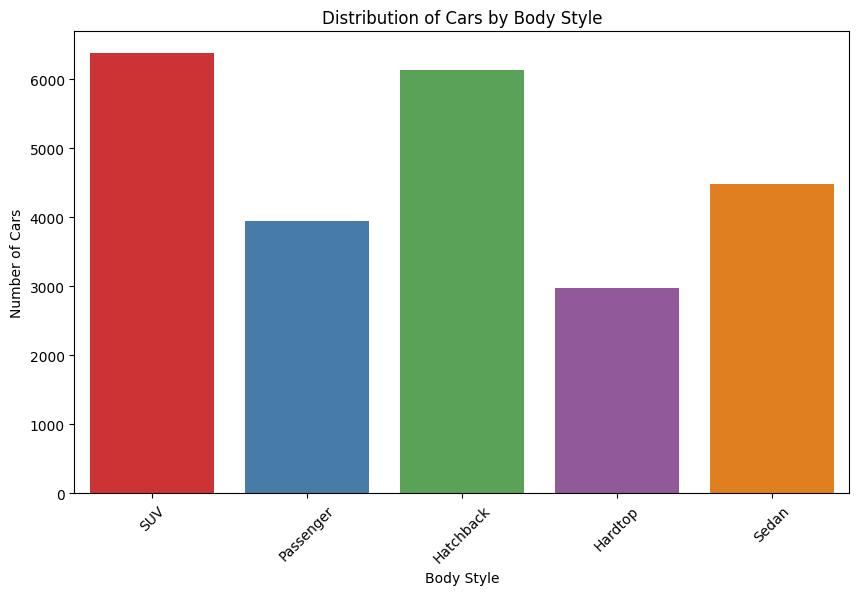

Car Counts by Body Style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [ ]:
# 5. What is the distribution of cars based on body styles?

# Plot count of cars by body style
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df, palette='Set1')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

# Print the count of each body style
body_style_counts = df['Body Style'].value_counts()
print("Car Counts by Body Style:\n", body_style_counts)

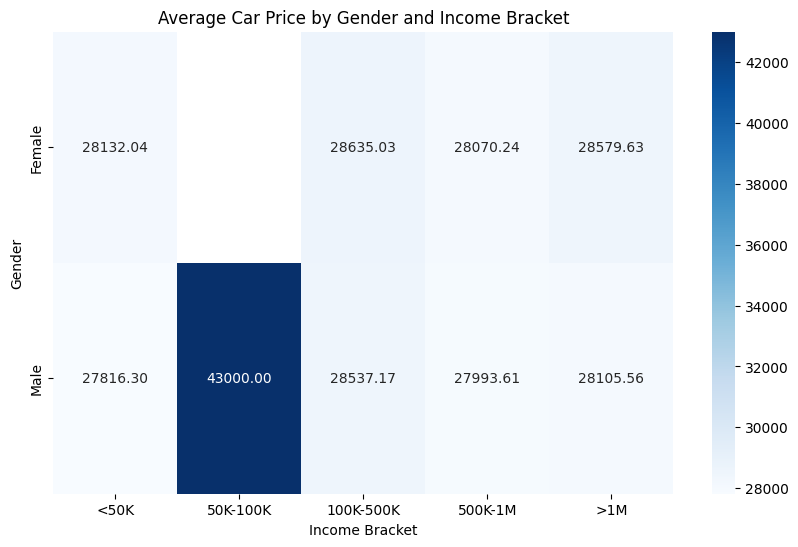

Average Price by Gender and Income Bracket:
 Income_Bracket          <50K  50K-100K     100K-500K       500K-1M  \
Gender                                                               
Female          28132.038732       NaN  28635.027119  28070.242135   
Male            27816.302247   43000.0  28537.169450  27993.611332   

Income_Bracket           >1M  
Gender                        
Female          28579.626947  
Male            28105.557471  


In [ ]:
# 6.  How does the average selling price of cars vary by customer gender and annual income?

# Create income brackets
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 500000, 1000000, float('inf')],
                              labels=['<50K', '50K-100K', '100K-500K', '500K-1M', '>1M'])

# Calculate average price by gender and income bracket
avg_price_gender_income = df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_price_gender_income, annot=True, fmt='.2f', cmap='Blues')
plt.title('Average Car Price by Gender and Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Gender')
plt.show()

print("Average Price by Gender and Income Bracket:\n", avg_price_gender_income)

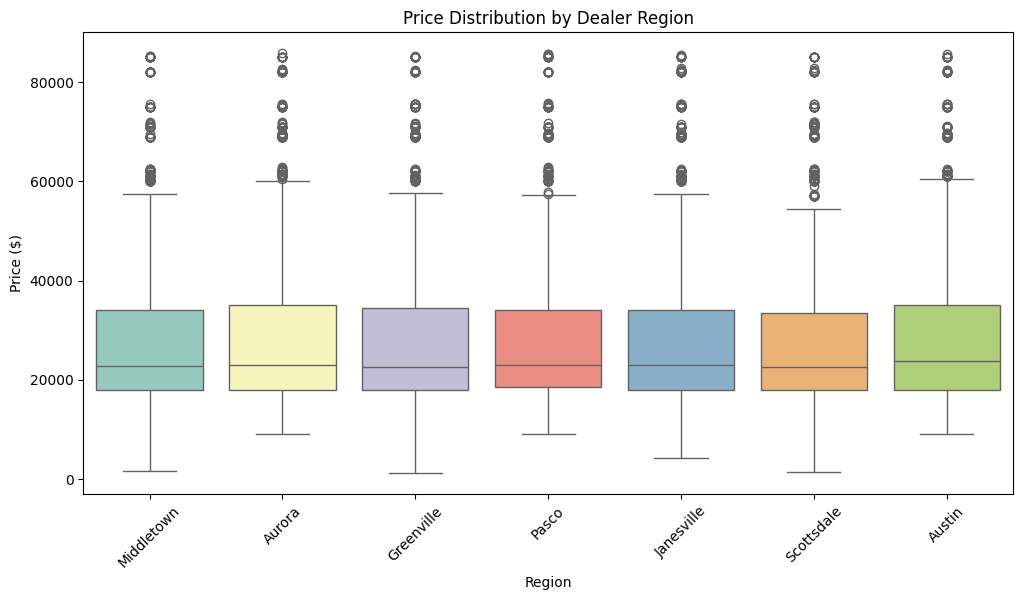

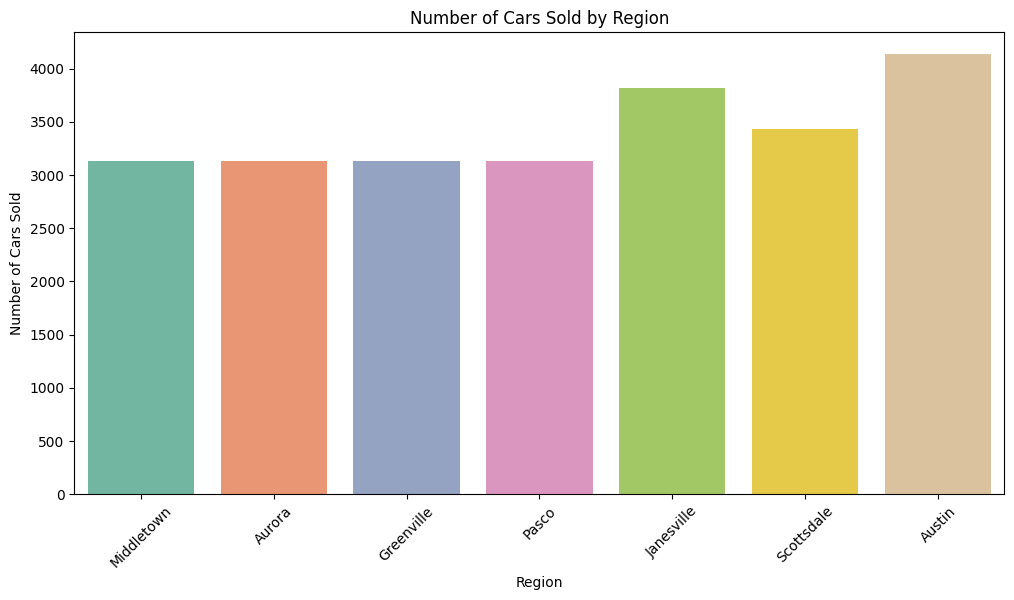

Number of Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [ ]:
# 7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

# Price distribution by region (repeated from Q3 for completeness)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set3')
plt.title('Price Distribution by Dealer Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Count of cars sold by region
plt.figure(figsize=(12, 6))
sns.countplot(x='Dealer_Region', data=df, palette='Set2')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

# Print counts
region_counts = df['Dealer_Region'].value_counts()
print("Number of Cars Sold by Region:\n", region_counts)

In [ ]:
#insights >> High sales volumes in certain regions correlate with economic activity or
# population density, while price distributions indicate regional preferences for specific
# car types.



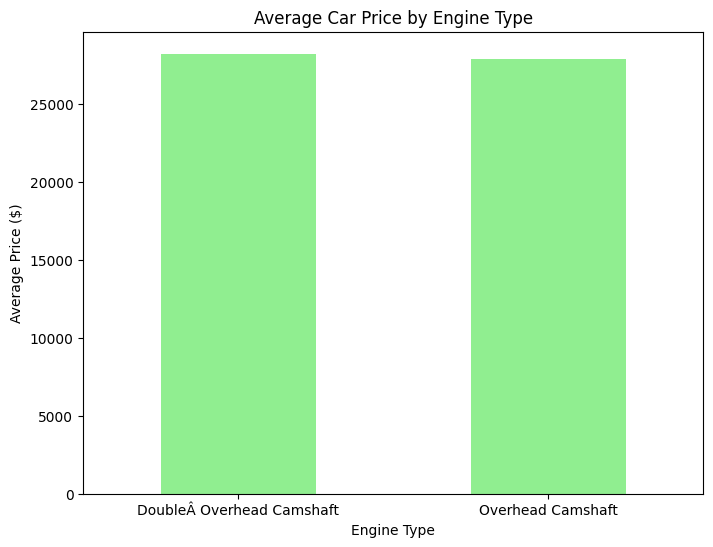

Average Price by Engine Type:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [ ]:
# 8. How does the average car price differ between cars with different engine sizes?

# Calculate average price by engine type
avg_price_engine = df.groupby('Engine')['Price ($)'].mean()

# Plot bar chart
plt.figure(figsize=(8, 6))
avg_price_engine.plot(kind='bar', color='lightgreen')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()

print("Average Price by Engine Type:\n", avg_price_engine)

In [ ]:
# here we can see price difference suggests that double overhead camshaft engines are associated
#with higher-end models.

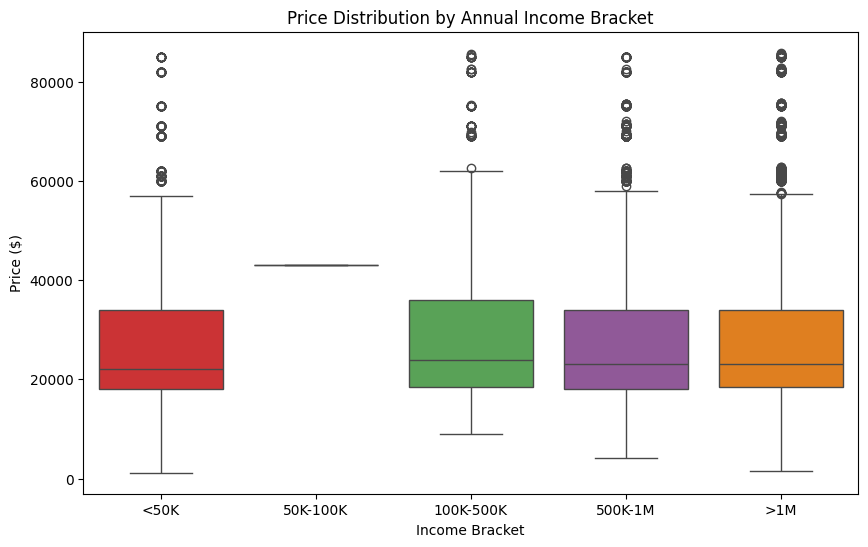

Price Statistics by Income Bracket:
                  count          mean           std      min      25%      50%  \
Income_Bracket                                                                  
<50K            5275.0  27884.297820  14909.070561   1200.0  18000.0  22001.0   
50K-100K           1.0  43000.000000           NaN  43000.0  43000.0  43000.0   
100K-500K       2207.0  28563.329860  15093.212478   9000.0  18501.0  24000.0   
500K-1M         8875.0  28011.726423  14740.941729   4200.0  18000.0  23000.0   
>1M             7548.0  28186.202040  14669.007359   1450.0  18500.0  23000.0   

                    75%      max  
Income_Bracket                    
<50K            34000.0  85001.0  
50K-100K        43000.0  43000.0  
100K-500K       36000.0  85500.0  
500K-1M         34000.0  85001.0  
>1M             34001.0  85800.0  


In [ ]:
# 9.How do car prices vary based on the customer’s annual income bracket?

# Plot boxplot of prices by income bracket
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df, palette='Set1')
plt.title('Price Distribution by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.show()

# Calculate summary statistics
income_price_stats = df.groupby('Income_Bracket')['Price ($)'].describe()
print("Price Statistics by Income Bracket:\n", income_price_stats)

In [ ]:
# insights>> Wealthier customers tend to buy more expensive cars, but lower-income buyers
#occasionally purchase high-priced vehicles, possibly through financing or used car markets.



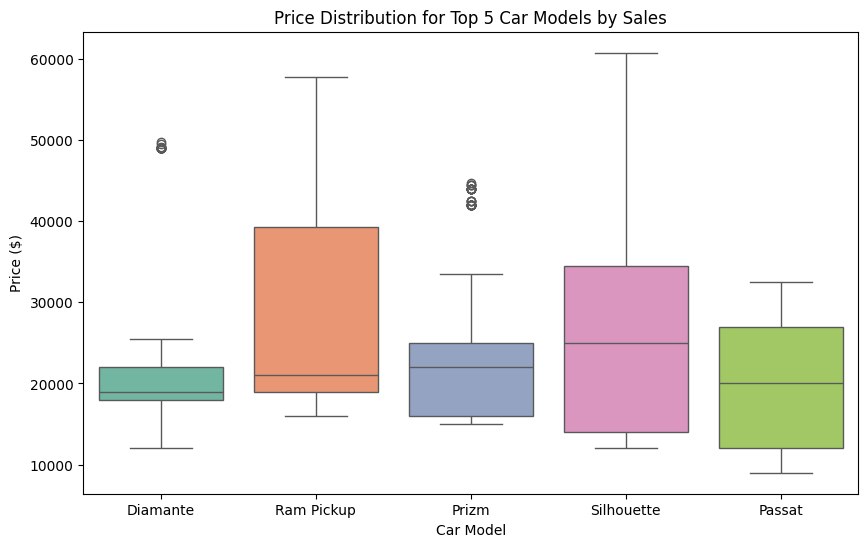

Top 5 Models by Sales:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [ ]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

# Get top 5 models by sales
top_models = df['Model'].value_counts().head(5).index

# Filter data for top 5 models
top_models_data = df[df['Model'].isin(top_models)]

# Plot boxplot of prices for top 5 models
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_data, palette='Set2')
plt.title('Price Distribution for Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()

# Print sales counts
print("Top 5 Models by Sales:\n", df['Model'].value_counts().head(5))

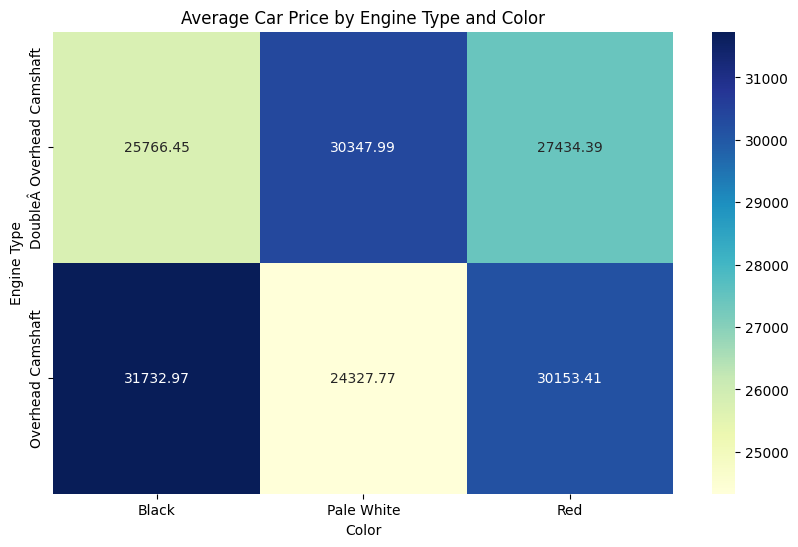

Price Variation by Color (Standard Deviation):
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [ ]:
# 11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# Calculate average price by engine and color
avg_price_engine_color = df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_price_engine_color, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Car Price by Engine Type and Color')
plt.xlabel('Color')
plt.ylabel('Engine Type')
plt.show()

# Calculate price variation by color
price_variation_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation by Color (Standard Deviation):\n", price_variation_color)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

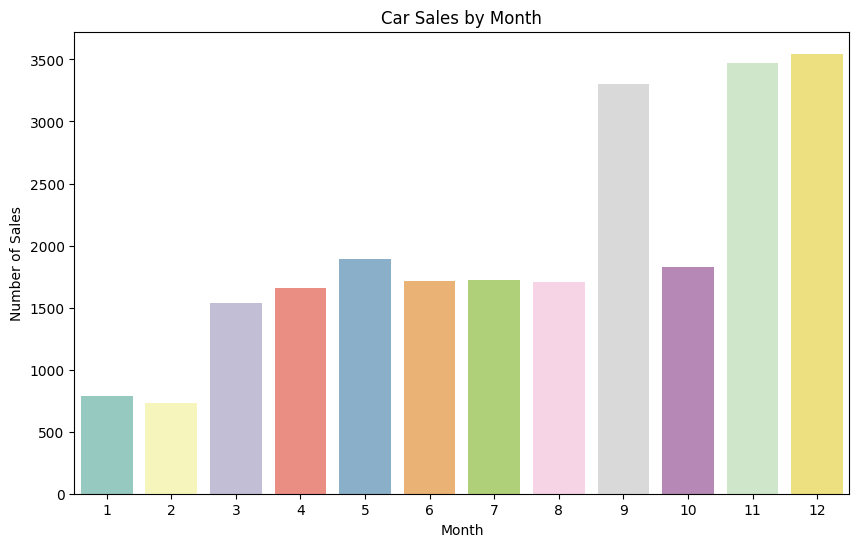

Sales by Month:
 Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


In [ ]:
# 12.  Is there any seasonal trend in car sales based on the date of sale?

# Extract month from Date
df['Month'] = df['Date'].dt.month

# Plot sales count by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='Set3')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

# Print sales counts by month
monthly_sales = df['Month'].value_counts().sort_index()
print("Sales by Month:\n", monthly_sales)

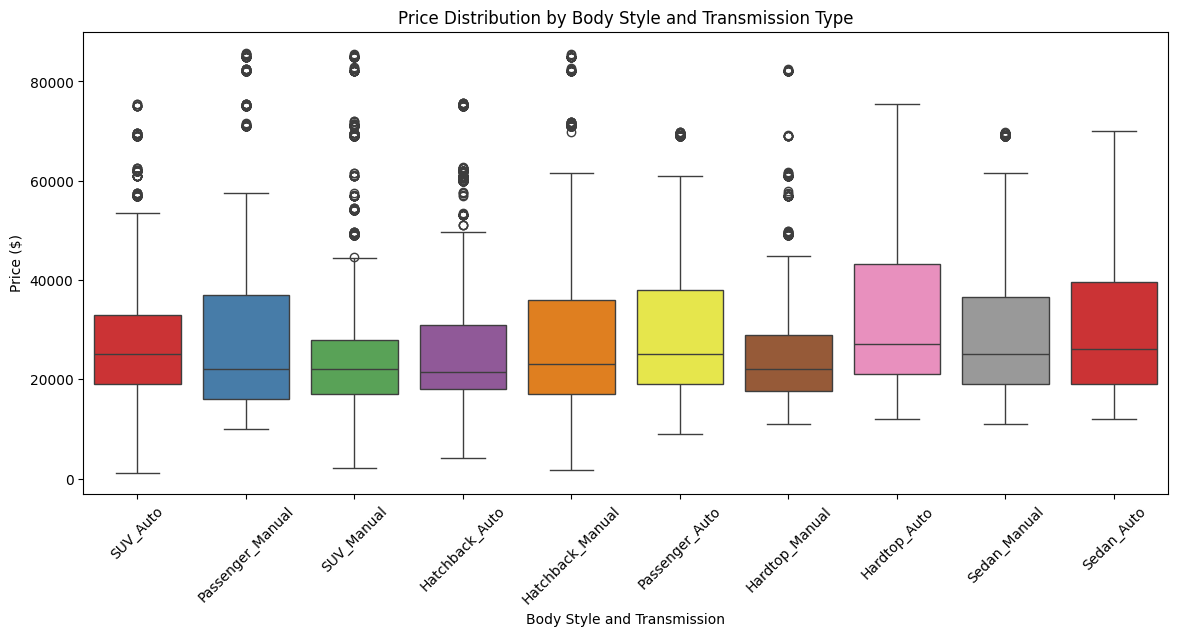

Price Statistics by Body Style and Transmission:
                     count          mean           std      min      25%  \
Body_Transmission                                                         
Hardtop_Auto       1408.0  31520.188210  13687.756740  12000.0  21001.0   
Hardtop_Manual     1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback_Auto     3458.0  25910.544824  13144.014337   4200.0  18001.0   
Hatchback_Manual   2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger_Auto     2020.0  28915.835149  13946.481932   9000.0  19000.0   
Passenger_Manual   1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV_Auto           3086.0  27501.404407  13299.927913   1200.0  19000.0   
SUV_Manual         3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan_Auto         2599.0  29955.294344  14310.910860  12000.0  19000.0   
Sedan_Manual       1889.0  29664.271572  15440.056434  11000.0  19001.0   

                       50%      75%      max  
Bo

In [ ]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?


# Create a combined column for Body Style and Transmission
df['Body_Transmission'] = df['Body Style'] + '_' + df['Transmission']

# Plot boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Body_Transmission', y='Price ($)', data=df, palette='Set1')
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style and Transmission')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# Calculate summary statistics
body_trans_stats = df.groupby('Body_Transmission')['Price ($)'].describe()
print("Price Statistics by Body Style and Transmission:\n", body_trans_stats)

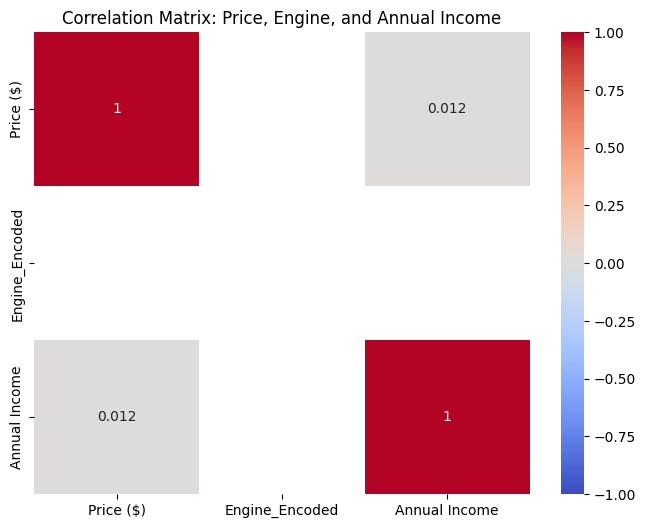

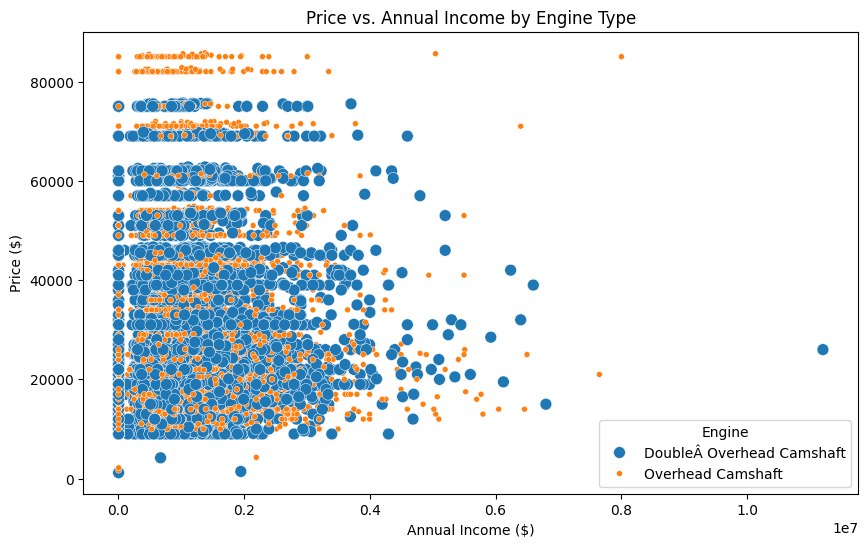

Correlation Matrix:
                 Price ($)  Engine_Encoded  Annual Income
Price ($)        1.000000             NaN       0.012065
Engine_Encoded        NaN             NaN            NaN
Annual Income    0.012065             NaN       1.000000


In [ ]:
 # 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

 # Encode Engine type (Double Overhead Camshaft: 1, Overhead Camshaft: 0)
df['Engine_Encoded'] = df['Engine'].map({'Double Overhead Camshaft': 1, 'Overhead Camshaft': 0})

# Calculate correlation matrix
corr_matrix = df[['Price ($)', 'Engine_Encoded', 'Annual Income']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Price, Engine, and Annual Income')
plt.show()

# Scatter plot to explore interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Engine', size='Engine', data=df)
plt.title('Price vs. Annual Income by Engine Type')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.show()

print("Correlation Matrix:\n", corr_matrix)

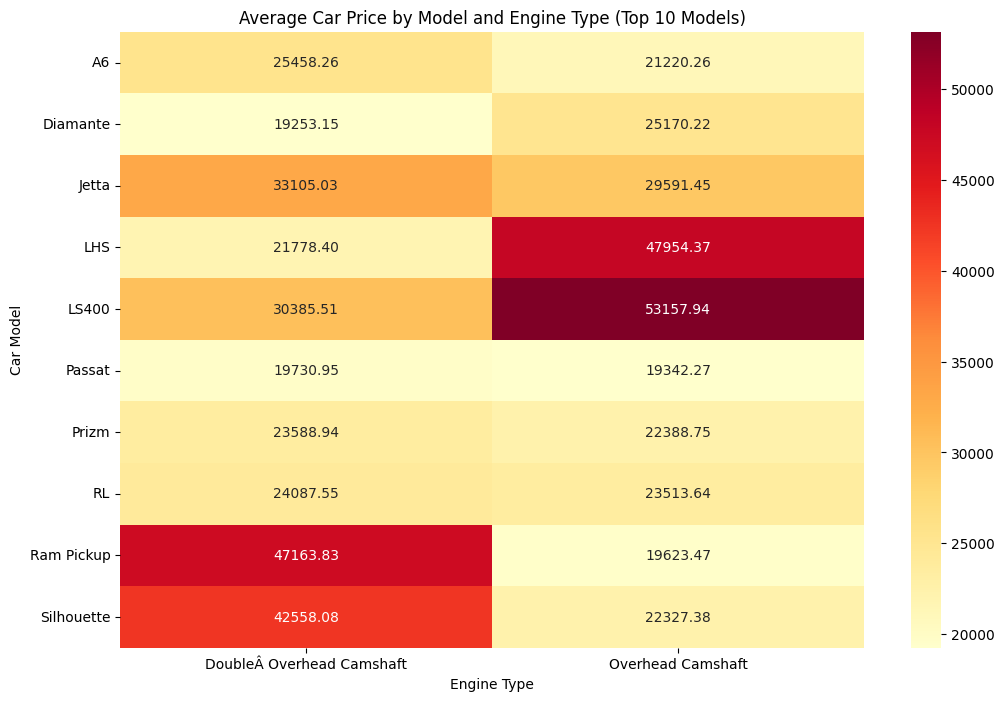

Average Price by Model and Engine Type:
 Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                   
A6                       25458.258929       21220.262673
Diamante                 19253.146341       25170.215962
Jetta                    33105.028571       29591.450980
LHS                      21778.396887       47954.369863
LS400                    30385.505000       53157.941558
Passat                   19730.953846       19342.267176
Prizm                    23588.941558       22388.750973
RL                       24087.545455       23513.637224
Ram Pickup               47163.833333       19623.472119
Silhouette               42558.078431       22327.375969


In [ ]:
# 15. How does the average car price vary across different car models and engine types?


# Get top 10 models by sales for clarity
top_models = df['Model'].value_counts().head(10).index
top_models_data = df[df['Model'].isin(top_models)]

# Calculate average price by model and engine
avg_price_model_engine = top_models_data.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(avg_price_model_engine, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Average Car Price by Model and Engine Type (Top 10 Models)')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.show()

print("Average Price by Model and Engine Type:\n", avg_price_model_engine)

# EDA Amazon Sales Data


In [ ]:
df = pd.read_csv('amazon.csv')

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
df.fillna('0', inplace = True)

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [ ]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1144,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1465 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:

print("Before Conversion - Rating Data Type:", df['rating'].dtype)
print("Sample Ratings:", df['rating'].head().tolist())

# Convert rating to float, handle errors, and then to integer
def convert_rating_to_int(rating):
    try:
        return int(round(float(rating)))
    except (ValueError, TypeError):
        return None

# Apply conversion
df['rating'] = df['rating'].apply(convert_rating_to_int)

print("Missing Ratings After Conversion:", df['rating'].isna().sum())

# Verify conversion
print("After Conversion - Rating Data Type:", df['rating'].dtype)
print("Sample Ratings:", df['rating'].head().tolist())

Before Conversion - Rating Data Type: float64
Sample Ratings: [4.0, 4.0, 4.0, 4.0, 4.0]
Missing Ratings After Conversion: 1
After Conversion - Rating Data Type: float64
Sample Ratings: [4.0, 4.0, 4.0, 4.0, 4.0]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
# 1. What is the average rating for each product category?

df['top_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Calculate average rating by top-level category
avg_rating_by_category = df.groupby('top_category')['rating'].mean().reset_index()

# Display result
print("Average Rating by Category:")
print(avg_rating_by_category)

Average Rating by Category:
            top_category    rating
0          Car&Motorbike  4.000000
1  Computers&Accessories  4.000000
2            Electronics  3.986692
3    Health&PersonalCare  4.000000
4           Home&Kitchen  3.982103
5        HomeImprovement  4.000000
6     MusicalInstruments  4.000000
7         OfficeProducts  4.000000
8             Toys&Games  4.000000


In [ ]:
# 2.  What are the top rating_count products by category

# Convert rating_count to numeric (remove commas and handle non-numeric values)
df['rating_count'] = df['rating_count'].replace(',', '').astype(float)

# Group by top_category and find the product with the highest rating_count
top_rating_count_by_category = df.groupby('top_category').apply(
    lambda x: x.loc[x['rating_count'].idxmax(), ['product_name', 'rating_count']]
).reset_index()

print("Top Rating Count Products by Category:")
print(top_rating_count_by_category)

Top Rating Count Products by Category:
            top_category                                       product_name  \
0          Car&Motorbike  Reffair AX30 [MAX] Portable Air Purifier for C...   
1  Computers&Accessories          SanDisk Cruzer Blade 32GB USB Flash Drive   
2            Electronics  AmazonBasics Flexible Premium HDMI Cable (Blac...   
3    Health&PersonalCare  Dr Trust Electronic Kitchen Digital Scale Weig...   
4           Home&Kitchen  Pigeon Polypropylene Mini Handy and Compact Ch...   
5        HomeImprovement  Gizga Essentials Cable Organiser, Cord Managem...   
6     MusicalInstruments  Boya ByM1 Auxiliary Omnidirectional Lavalier C...   
7         OfficeProducts  Casio FX-82MS 2nd Gen Non-Programmable Scienti...   
8             Toys&Games  Faber-Castell Connector Pen Set - Pack of 25 (...   

   rating_count  
0        1118.0  
1      253105.0  
2      426973.0  
3        3663.0  
4      270563.0  
5        5985.0  
6       68664.0  
7       12179.0  
8       

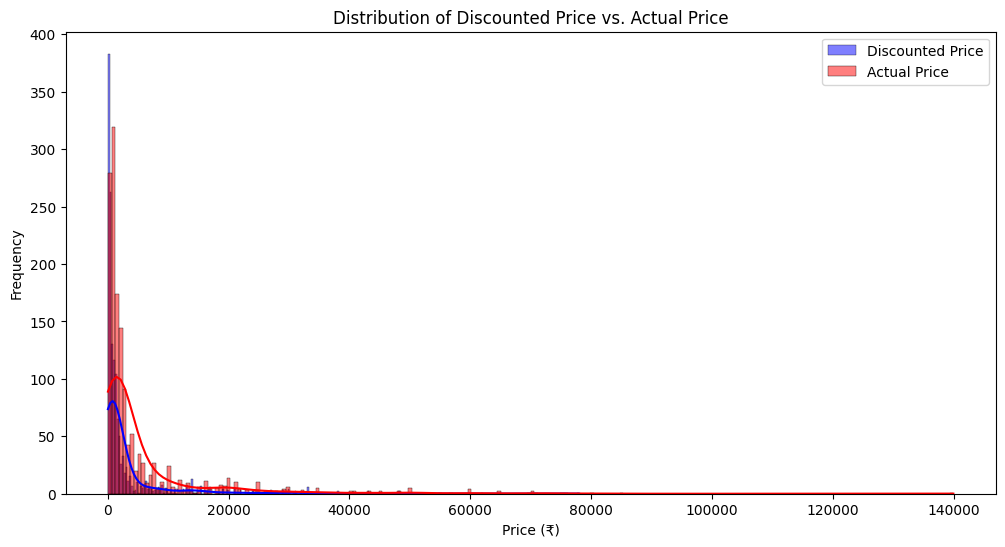

In [ ]:
# 3. What is the distribution of discounted prices vs. actual prices?


# Convert price columns to numeric (remove ₹ and commas)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True, alpha=0.5)
sns.histplot(df['actual_price'], color='red', label='Actual Price', kde=True, alpha=0.5)
plt.title('Distribution of Discounted Price vs. Actual Price')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'top_category'],
      dtype='object')

Average Discount Percentage by Category:
            top_category  discount_percentage
0          Car&Motorbike            42.000000
1  Computers&Accessories            54.024283
2            Electronics            50.828897
3    Health&PersonalCare            53.000000
4           Home&Kitchen            40.120536
5        HomeImprovement            57.500000
6     MusicalInstruments            46.000000
7         OfficeProducts            12.354839
8             Toys&Games             0.000000


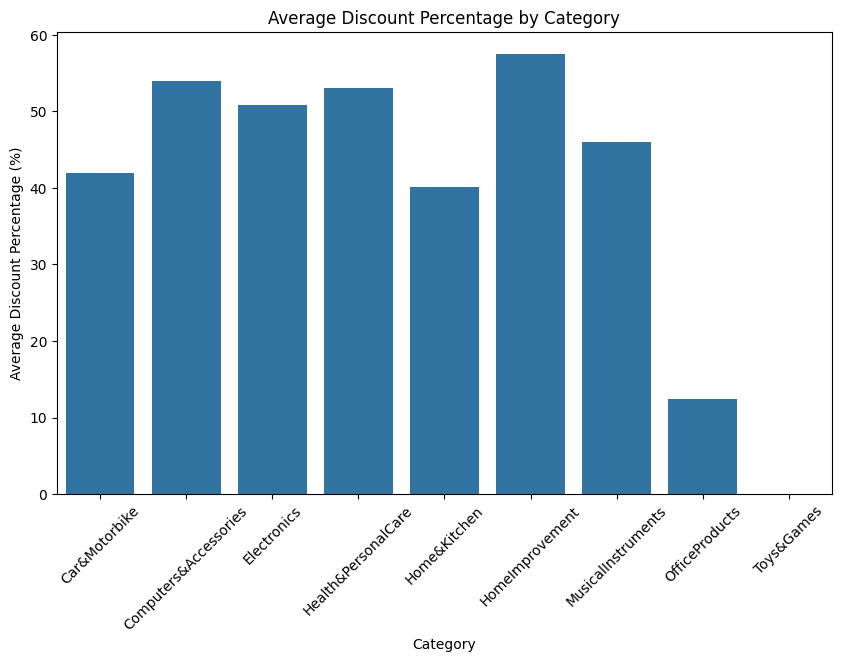

In [ ]:
# 4. How does the average discount percentage vary across categories?

# Convert discount_percentage to numeric (remove %)
df['discount_percentage'] = df['discount_percentage'].replace('%', '').astype(float)

# Calculate average discount percentage by category
avg_discount_by_category = df.groupby('top_category')['discount_percentage'].mean().reset_index()

# Display result
print("Average Discount Percentage by Category:")
print(avg_discount_by_category)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='top_category', y='discount_percentage', data = avg_discount_by_category)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 5. What are the most popular product names?

# Sort by rating_count and select top 5
top_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)

# Display result
print("Top 5 Most Popular Product Names (by Rating Count):")
print(top_products)

Top 5 Most Popular Product Names (by Rating Count):
                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0


In [ ]:
# 7. What are the most popular product reviews?

# Add review length column
df['review_length'] = df['review_content'].apply(len)

# Sort by review_length and select top 5
top_reviews = df[['product_name', 'review_content', 'review_length']].sort_values(by='review_length', ascending=False).head(5)

# Display result
print("Top 5 Most Popular Product Reviews (by Length):")
print(top_reviews[['product_name', 'review_content']])

Top 5 Most Popular Product Reviews (by Length):
                                           product_name  \
1056  Philips GC1905 1440-Watt Steam Iron with Spray...   
656   Boult Audio Probass Curve Bluetooth Wireless i...   
41    Mi 108 cm (43 inches) Full HD Android LED TV 4...   
718   SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive...   
420   boAt Xtend Smartwatch with Alexa Built-in, 1.6...   

                                         review_content  
1056  Update as on 28.10.2018:**********************...  
656   I have just received my BoultCurve. Its really...  
41    NOTE:@ If you select brand-authorized TV insta...  
718   Update:I returned the drive with money reverte...  
420   Review OverviewAverage2.7The Boat today launch...  


Correlation between Discounted Price and Rating: 0.0669


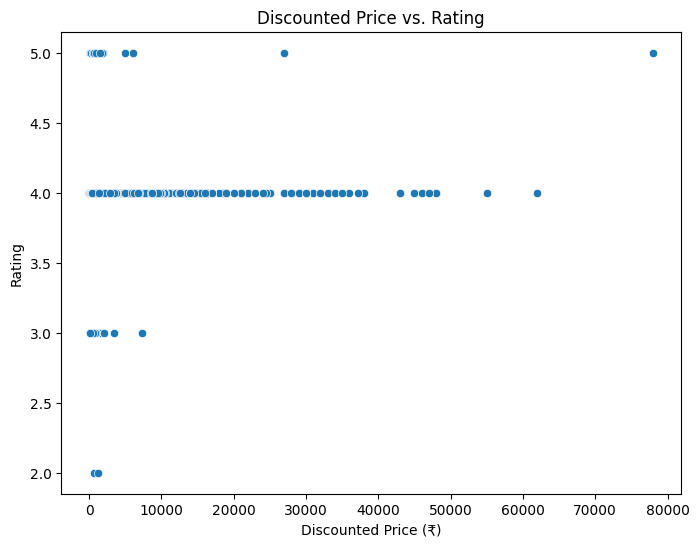

In [ ]:
# 8. What is the correlation between discounted_price and rating?

# Calculate correlation
correlation = df['discounted_price'].corr(df['rating'])

# Display result
print(f"Correlation between Discounted Price and Rating: {correlation:.4f}")

# Visualize with scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title('Discounted Price vs. Rating')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.show()

In [ ]:
# 9. What are the Top 5 categories based on the highest ratings?


# Get top 5 categories by average rating
top_categories = df.groupby('top_category')['rating'].mean().reset_index().sort_values(by='rating', ascending=False).head(5)

# Display result
print("Top 5 Categories by Highest Average Rating:")
print(top_categories)

Top 5 Categories by Highest Average Rating:
            top_category  rating
0          Car&Motorbike     4.0
1  Computers&Accessories     4.0
3    Health&PersonalCare     4.0
6     MusicalInstruments     4.0
5        HomeImprovement     4.0


In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis?

# Identify low-rated products
low_rated_products = df[df['rating'] < 3.5][['product_name', 'rating', 'review_content']]

# Identify high discount but low rating products
high_discount_low_rating = df[(df['discount_percentage'] > 50) & (df['rating'] < 3.5)][['product_name', 'discount_percentage', 'rating']]

# Display results
print("Low-Rated Products (Rating < 3.5):")
print(low_rated_products)

print("\nHigh Discount but Low Rating Products:")
print(high_discount_low_rating)

# Sentiment analysis on reviews (basic keyword-based)
negative_keywords = ['bad', 'poor', 'not', 'disappointed', 'faulty']
df['negative_sentiment'] = df['review_content'].apply(lambda x: any(keyword in x.lower() for keyword in negative_keywords))

# Summarize negative sentiment by category
negative_sentiment_by_category = df.groupby('top_category')['negative_sentiment'].mean().reset_index()

print("\nNegative Sentiment Proportion by Category:")
print(negative_sentiment_by_category)

Low-Rated Products (Rating < 3.5):
                                           product_name  rating  \
45    Wecool Nylon Braided Multifunction Fast Chargi...     3.0   
82    SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...     3.0   
142   LRIPL Mi Remote Control with Netflix & Prime V...     3.0   
154   GENERIC Ultra-Mini Bluetooth CSR 4.0 USB Dongl...     3.0   
179   7SEVEN® Bluetooth Voice Command Remote for Xia...     3.0   
236   7SEVEN® TCL Remote Control Smart TV RC802V Rem...     3.0   
263   7SEVEN Compatible LG TV Remote Suitable for LG...     3.0   
275   LOHAYA Voice Assistant Remote Compatible for A...     3.0   
282   Amazon Brand - Solimo 65W Fast Charging Braide...     3.0   
290                                    Firestick Remote     3.0   
318   7SEVEN® Compatible with Fire Tv Stick Remote w...     3.0   
463   PTron Newly Launched Force X10 Bluetooth Calli...     3.0   
492   PTron Newly Launched Force X10 Bluetooth Calli...     3.0   
506   PTron Newly Launched 

# EDA Spotify Data


In [3]:
df = pd.read_csv('spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [5]:
# q 1. Read the dataframe, check null values, handle them if present, check for duplicate rows, and handle them if present.



#check null values

df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [6]:
#checking duplicate

df.duplicated().sum()

np.int64(27)

In [7]:
#now dropping the values
df = df.drop_duplicates()

In [10]:
df.shape

(413, 5)

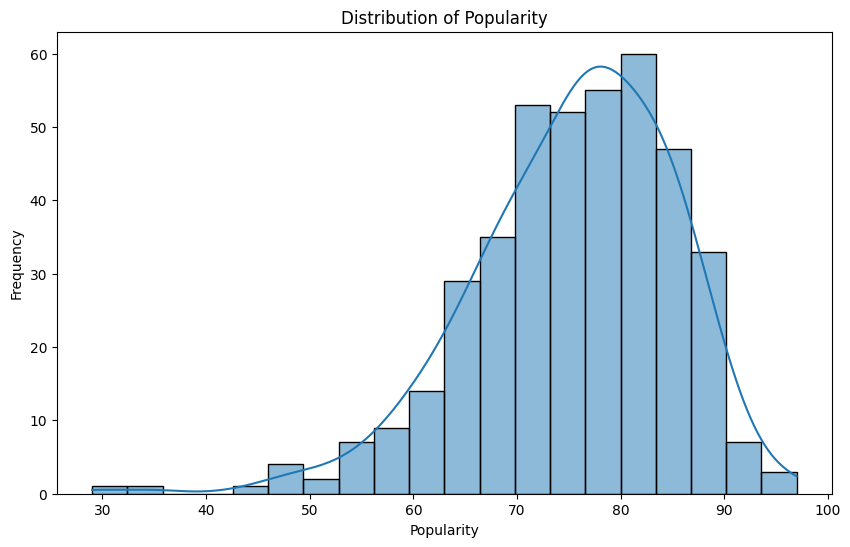

In [12]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

plt.figure(figsize = (10, 6))
sns.histplot(df['Popularity'], bins = 20, kde = True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [13]:
# q 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

correlation = df['Popularity'].corr(df['Duration (ms)'])
correlation

np.float64(0.03899200928439096)

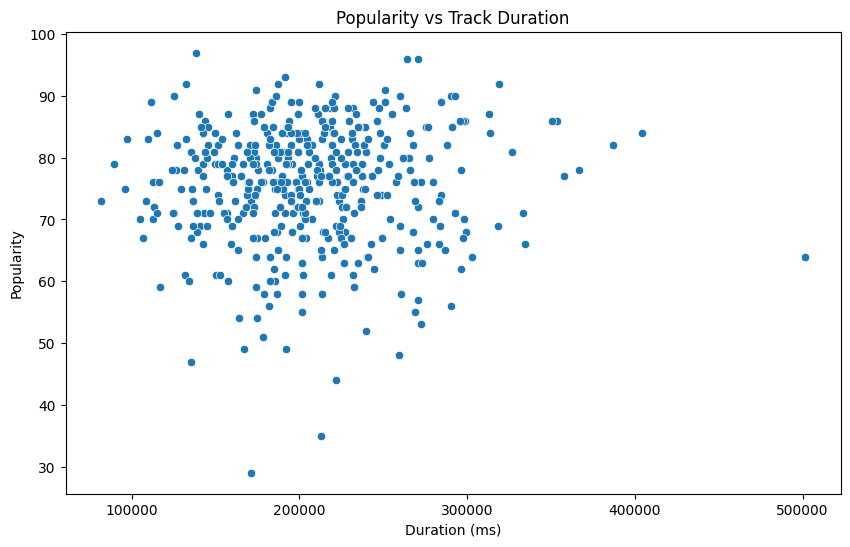

In [14]:
# Scatter plot of Popularity vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

In [16]:
# q 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.


# tracks per artist
artist_counts = df['Artist'].value_counts()
artist_counts

,count
Artist,
Drake,17
Eminem,11
Lil Nas X,10
JAY-Z,10
21 Savage,10
...,...
Lil Tjay,1
BigXthaPlug,1
Fat Joe,1


In [17]:
#artist with highest number of tracks
top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_count} tracks)")

Artist with the highest number of tracks: Drake (17 tracks)


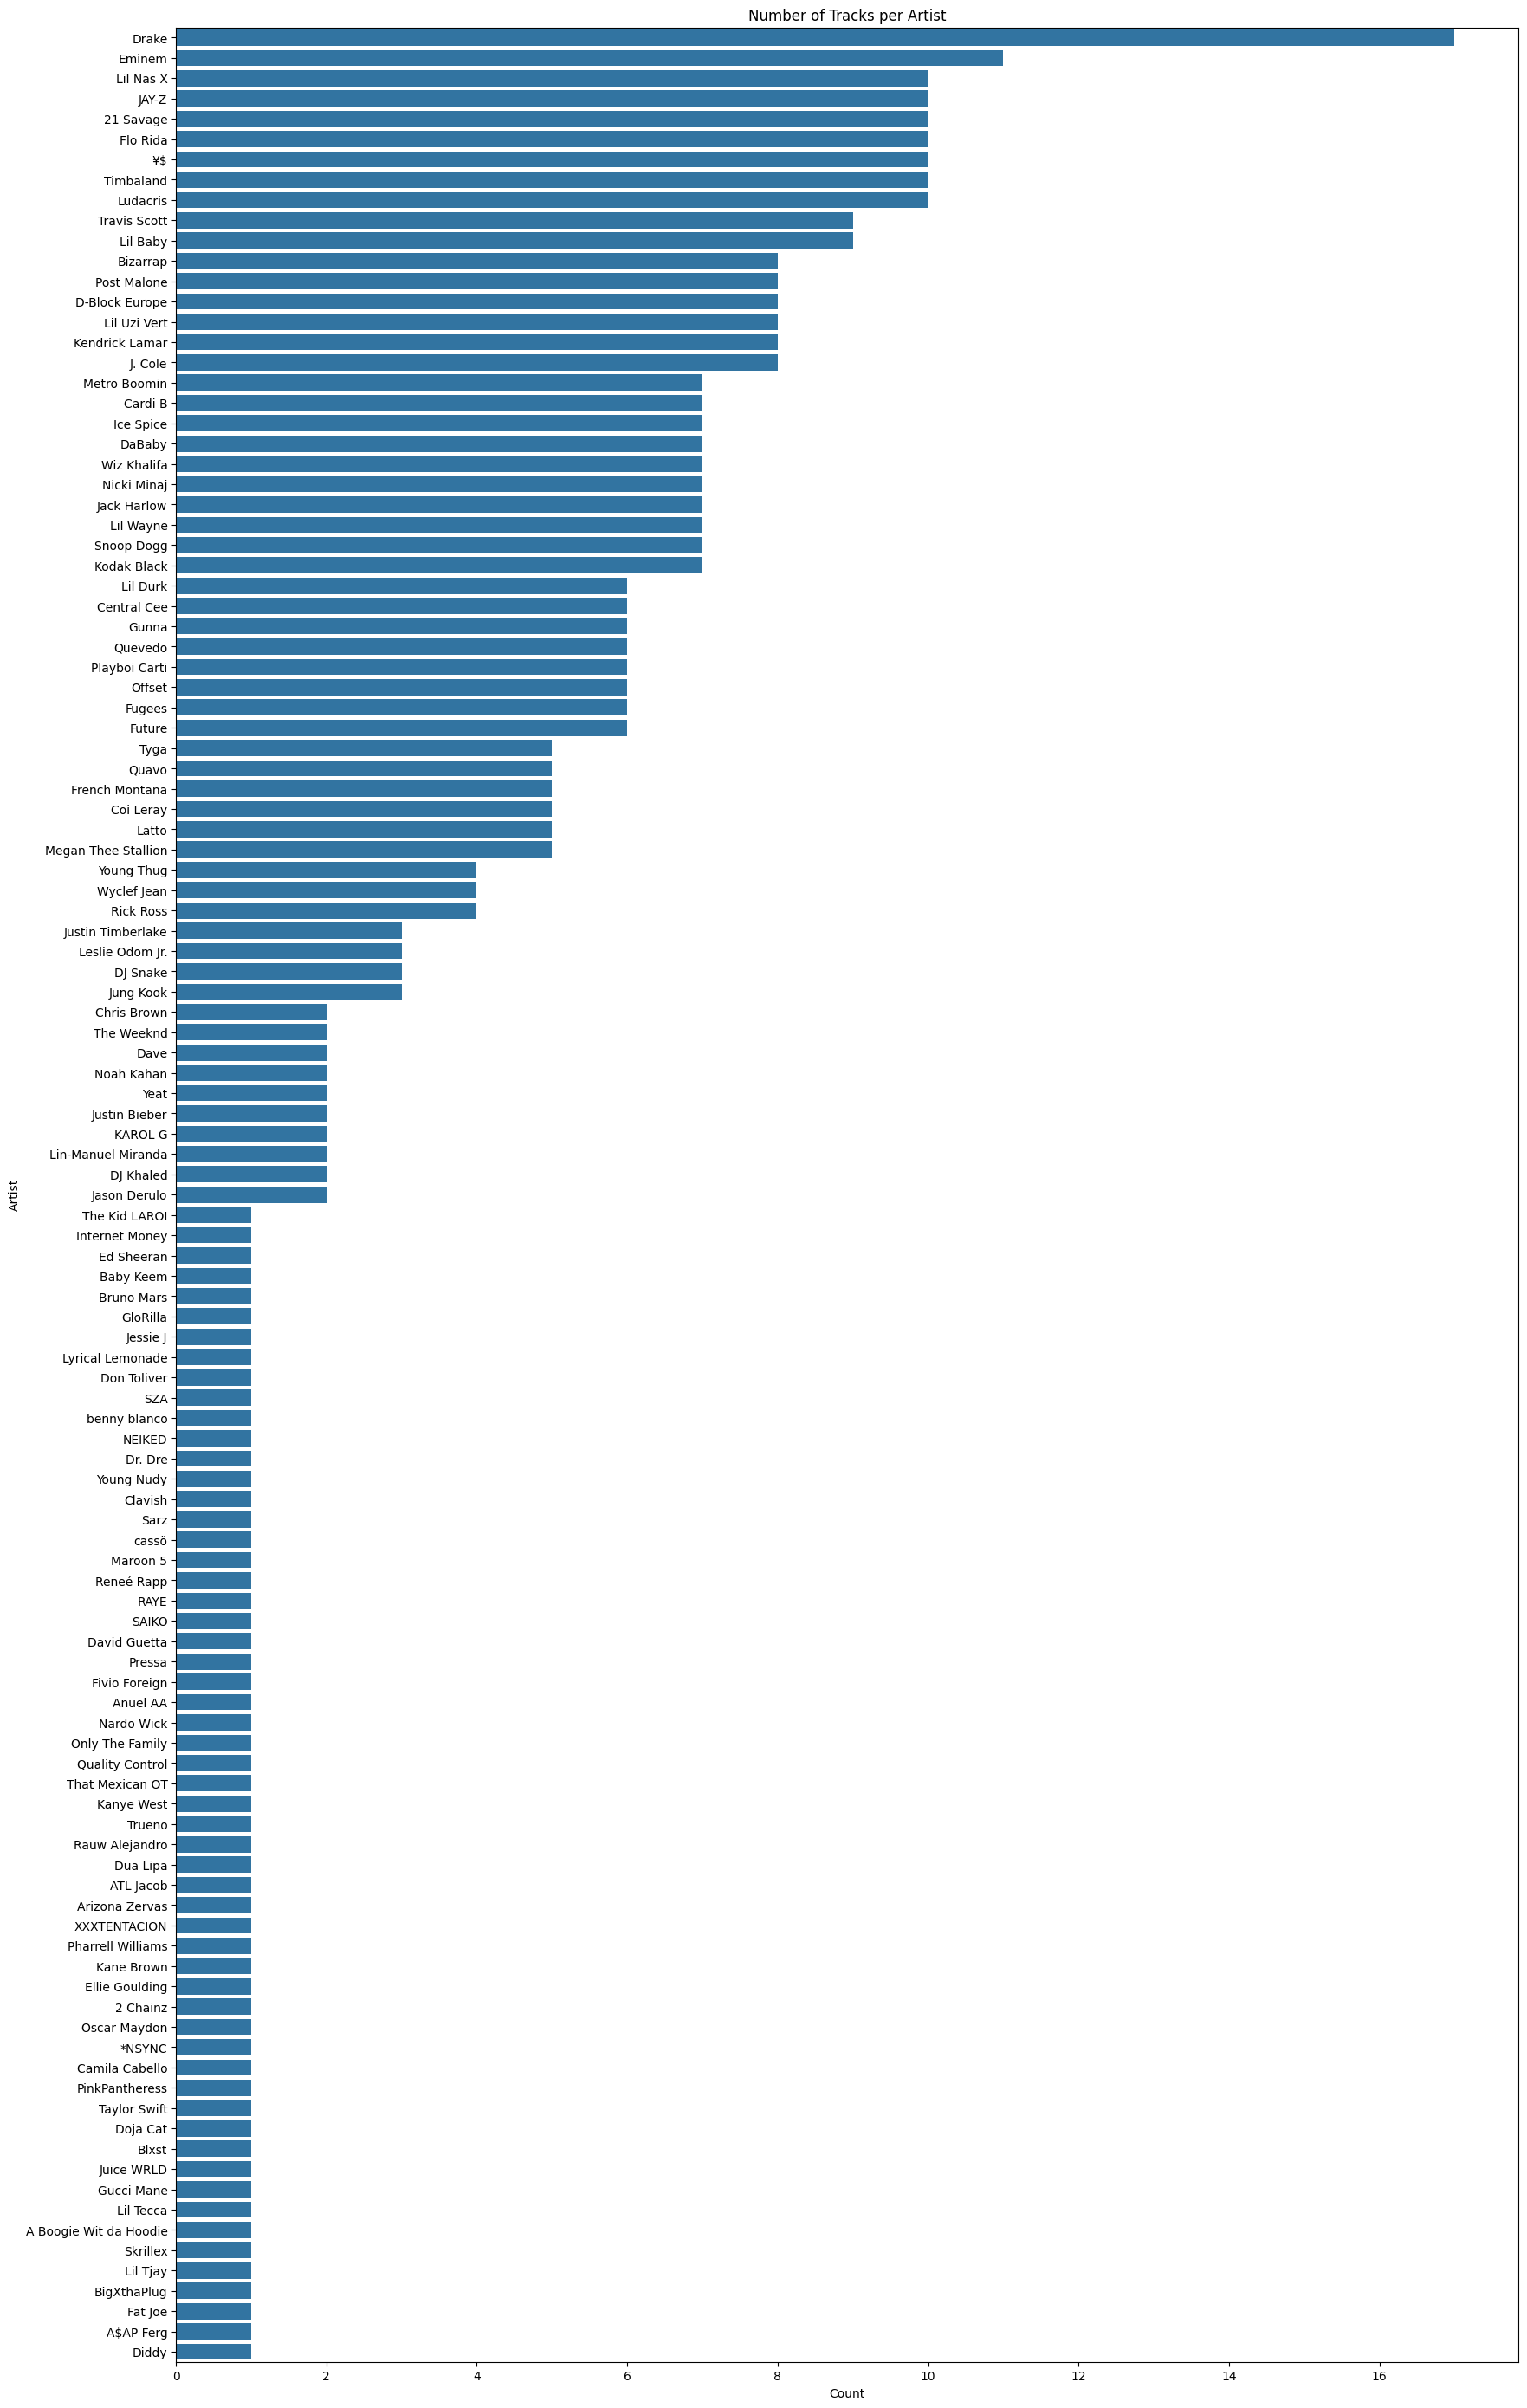

In [21]:
plt.figure(figsize=(20, 35))
sns.countplot(y='Artist', data=df, order=artist_counts.index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

In [22]:
# based on dataset Drage likely has the highest number of tracks

In [24]:
# q 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [25]:
# these are 5 least popular tracks in the dataset.

In [27]:
# q 6.  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.


#top 5 artists by number of tracks
top_5_artists = df['Artist'].value_counts().head(5).index
top_5_artists

Index(['Drake', 'Eminem', 'Lil Nas X', 'JAY-Z', '21 Savage'], dtype='object', name='Artist')

In [31]:
#calculating average popularity for these artists
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
avg_popularity

,Popularity
Artist,
21 Savage,83.800000
Drake,82.882353
Eminem,83.636364
JAY-Z,77.900000
Lil Nas X,75.900000


In [32]:
#artist with highest average popularity

top_avg_artist = avg_popularity.idxmax()
top_avg_value = avg_popularity.max()
print(f"Artist with the highest average popularity among the top 5 artists: {top_avg_artist} ({top_avg_value:.2f})")

Artist with the highest average popularity among the top 5 artists: 21 Savage (83.80)


In [33]:
# q 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


#most popular tracks of top 5 artists
most_popular_tracks = df[df['Artist'].isin(top_5_artists)].groupby('Artist').apply(lambda x: x.loc[x['Popularity'].idxmax()][['Track Name', 'Popularity']])
most_popular_tracks

,Track Name,Popularity
Artist,,
21 Savage,redrum,96
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
Eminem,Without Me,90
JAY-Z,Ni**as In Paris,86
Lil Nas X,THATS WHAT I WANT,81


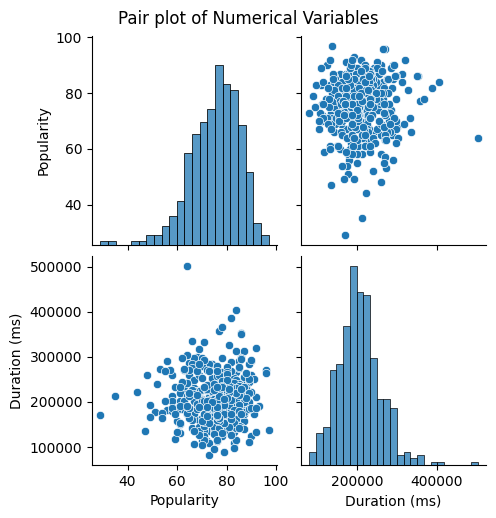

In [37]:
# q 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

nums_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(df[nums_cols])
plt.suptitle('Pair plot of Numerical Variables', y = 1.02)
plt.show()

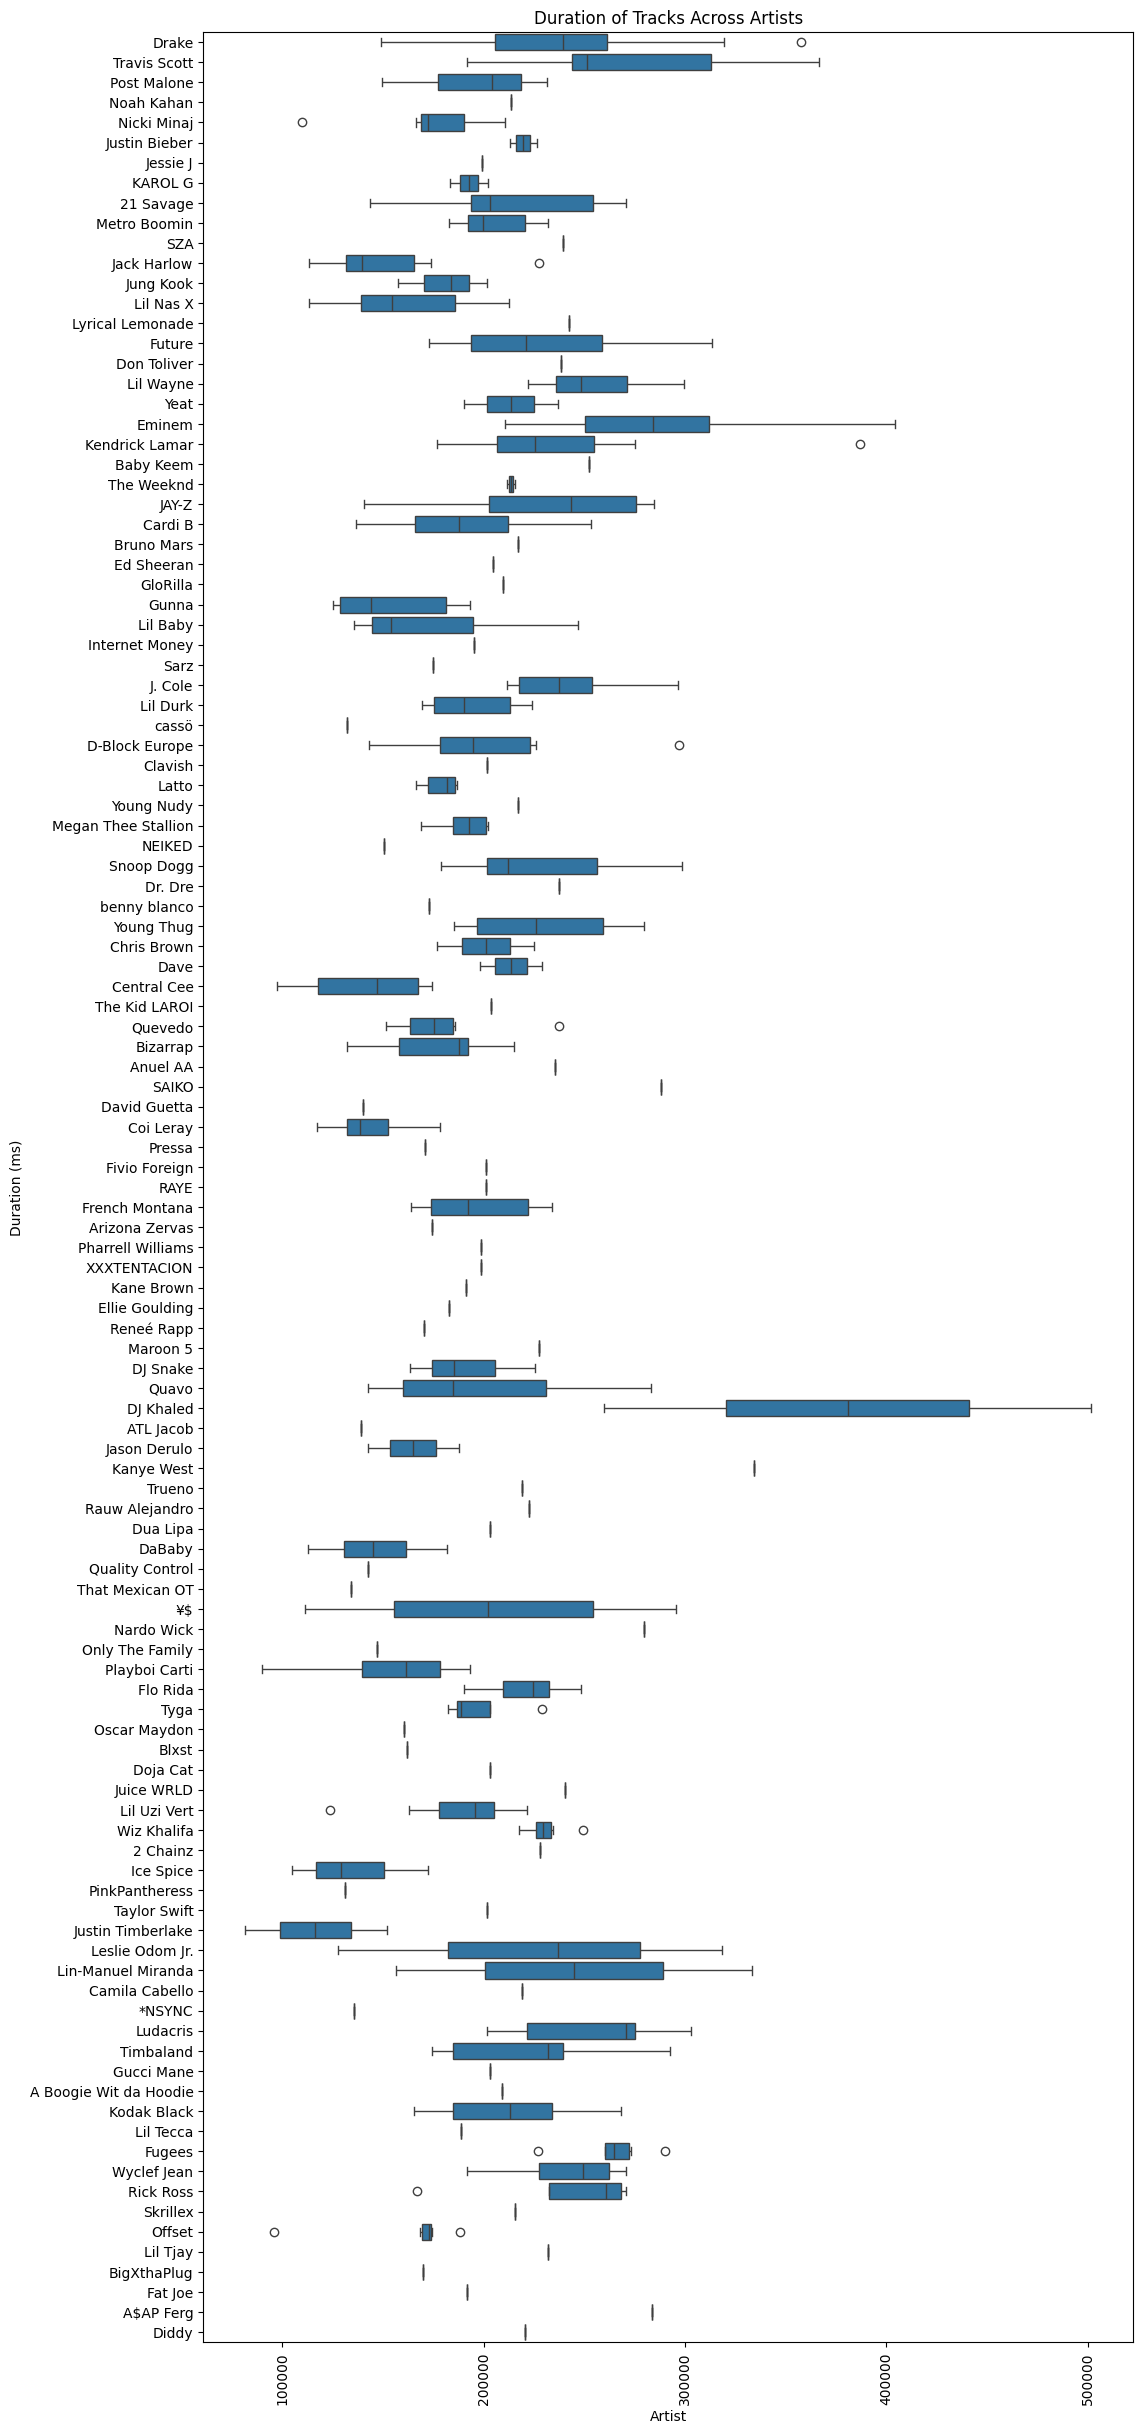

In [40]:
# q 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


plt.figure(figsize = (12, 30))
sns.boxplot(y = 'Artist', x = 'Duration (ms)', data = df)
plt.title('Duration of Tracks Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation = 90)
plt.show()

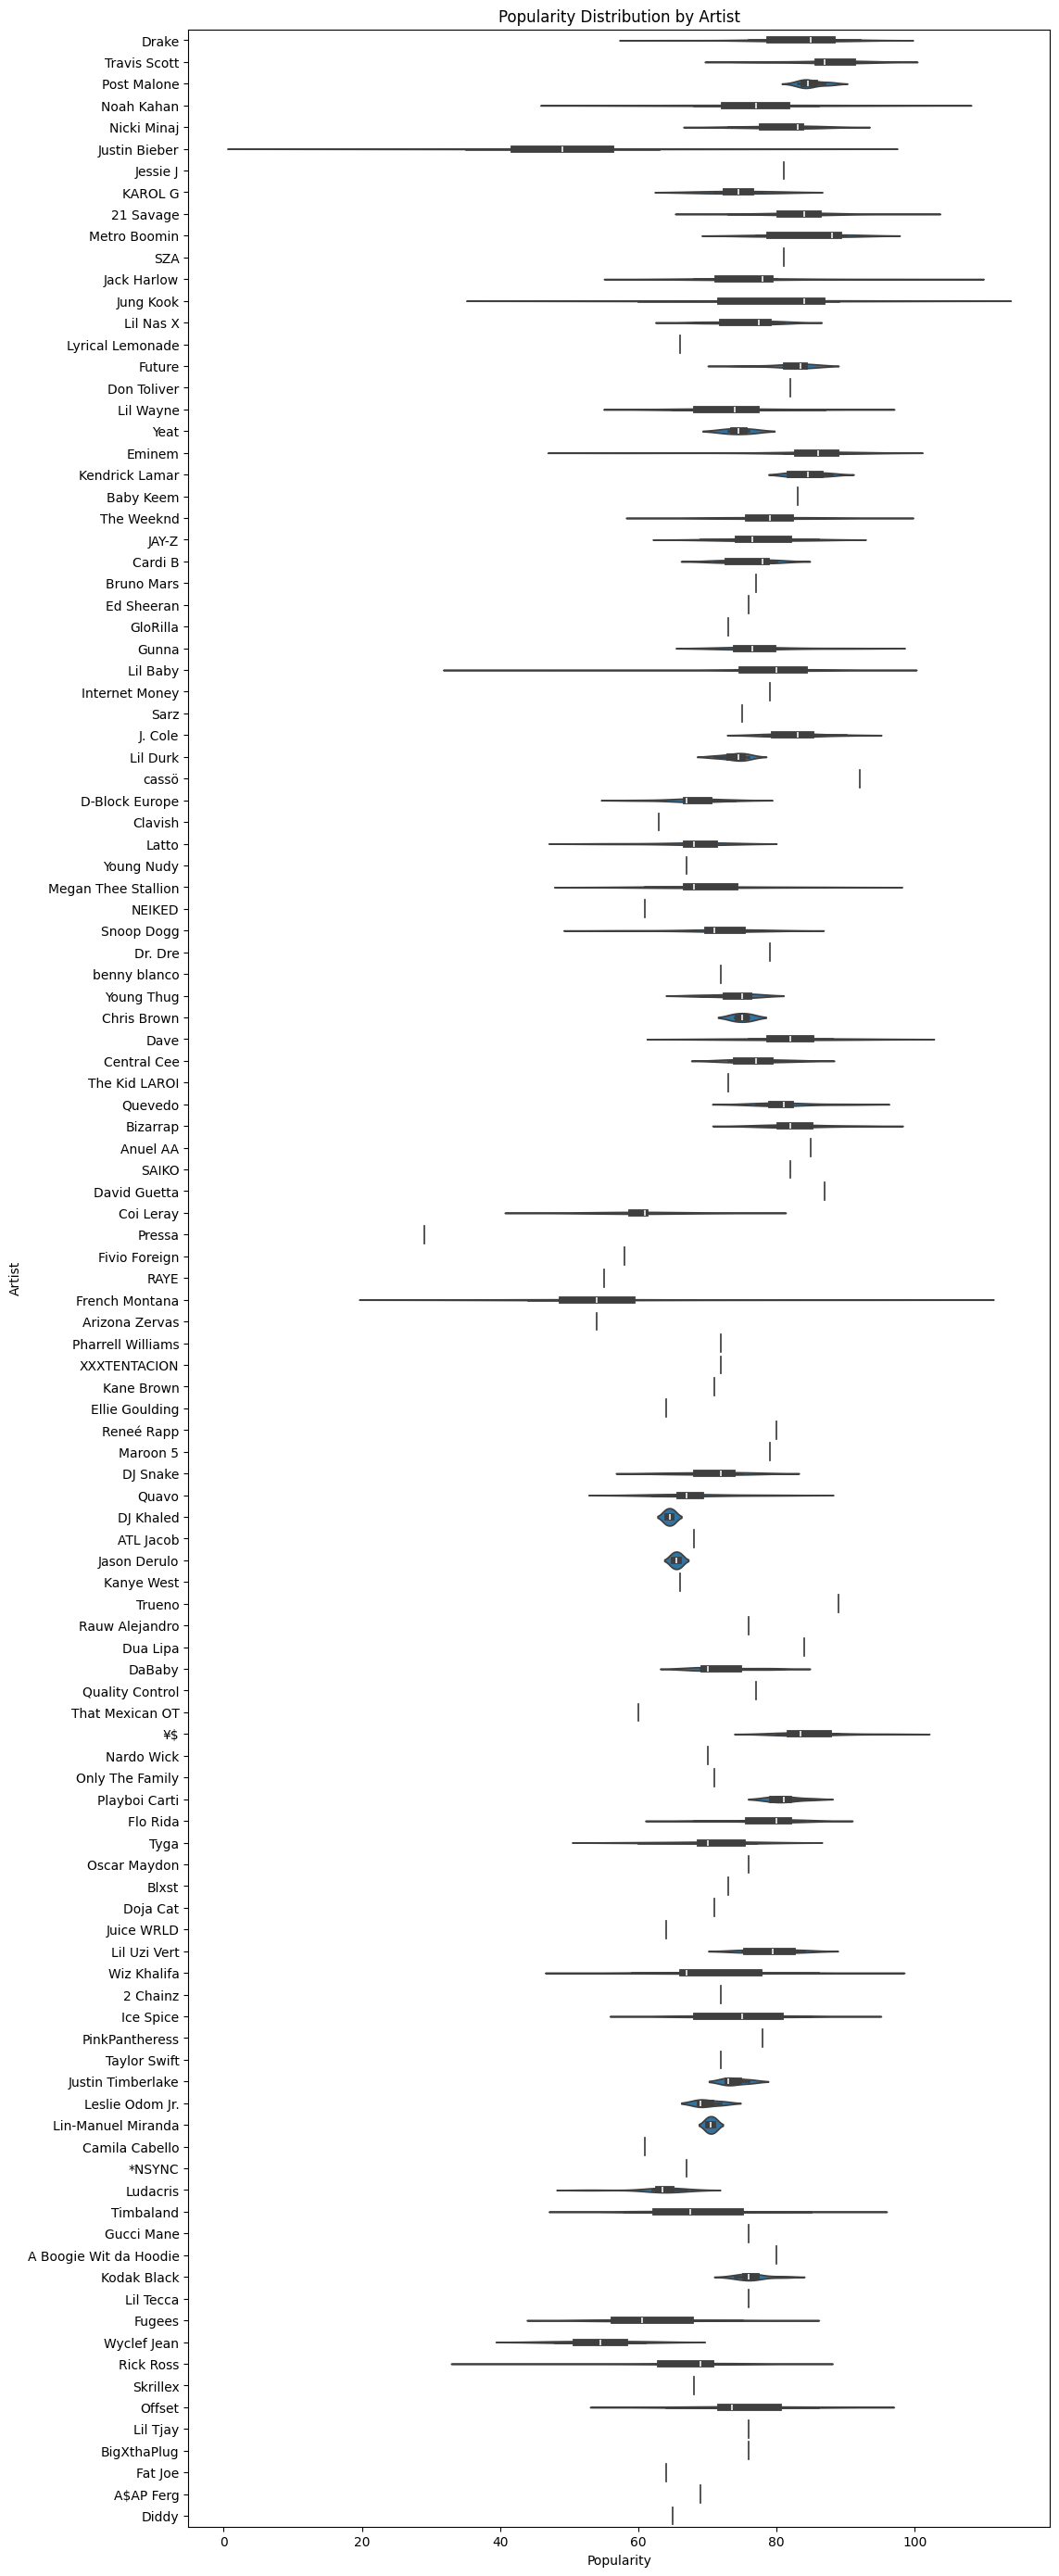

In [42]:
# q 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Violin plot of popularity by artist
plt.figure(figsize=(12, 35))
sns.violinplot(y='Artist', x='Popularity', data=df)
plt.title('Popularity Distribution by Artist')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.show()